In [1]:
import numpy as np
from csv import reader 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

A) Preprocessing Phase

In [2]:
# paramaters
S_ratio = 0.5
V_ratio = 0.35
T_ratio = 0.15

In [3]:
filename  = "fashion-mnist.csv"
learningset = []
# reading the dataset
with open(filename, 'r') as csvfile:
    csvreader = reader(csvfile)
    for row in csvreader:
        learningset.append(row)

dataset = np.array(learningset[1:])
# splitting features and labels
dataset = np.uint(dataset)
x, y = dataset[:,:-1], dataset[:,-1]

In [4]:
# splitting the dataset into train, validation, and test
x_train, x_remain, y_train, y_remain = tts(x,y, test_size=S_ratio)
x_val, x_test, y_val, y_test = tts(x_remain, y_remain, train_size = V_ratio/(1-S_ratio))

Fitting the models

A) Linear SVM

In [5]:
# We build a pipline of operations in which we normalize the data and select important features. After that, we apply linear SVM classification algorithm.
# PCA greatly increases our Convergance rate
svc_pl = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=100)), ('SVC_clf', LinearSVC(C=10 ,dual=False ,max_iter=10000))])

In [6]:
#simply fitting the model
svc_pl.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('SVC_clf', LinearSVC(C=10, dual=False, max_iter=10000))])

In [7]:
print('Accuracy and confusion matrix for the Validation set: \n')
print(svc_pl.score(x_val, y_val))
print(confusion_matrix(y_val, svc_pl.predict(x_val)))

Accuracy and confusion matrix for the Validation set: 

0.8191428571428572
[[271   1   7  29   2   0  24   2   3   0]
 [  3 322   3   8   1   0   1   0   0   0]
 [  5   1 247   8  69   1  33   1   8   0]
 [ 12   4   4 300  15   1  10   2   1   0]
 [  3   1  33  14 248   0  39   0   1   0]
 [  2   0   1   0   0 284   2  19   5  14]
 [ 62   2  46  10  34   0 199   0   9   0]
 [  0   0   0   0   0  13   0 324   1  16]
 [  3   3   3   6   1   3   8   3 333   0]
 [  0   0   0   0   1   6   3   6   1 339]]


In [8]:
print('Accuracy and confusion matrix for the Testing set: \n')
print(svc_pl.score(x_test, y_test))
print(confusion_matrix(y_test, svc_pl.predict(x_test)))

Accuracy and confusion matrix for the Testing set: 

0.8173333333333334
[[102   1   2  13   0   0  13   0   1   0]
 [  1 156   1   7   2   0   0   0   0   0]
 [  6   1 106   1  29   0  18   0   3   0]
 [  4   0   0 134   5   0   4   0   1   0]
 [  0   1   5   4 121   0  14   0   2   0]
 [  0   0   0   0   0 126   0   6   3   6]
 [ 28   1  18   6  12   1  84   0   1   0]
 [  0   0   0   0   0   6   0 150   0   7]
 [  3   3   2   3   2   5   1   0 114   3]
 [  0   0   0   0   0  10   0   8   0 133]]


B) Gaussian Kernel 

rbf: exp(-gamma*||x-x'||^2)

By iteratvie search and cross validation we choose the gamma = 0.002 and hence, sigma=250

In [9]:
svc_gaussian_pl = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=250)), ('SVC_clf', SVC(C=20 , kernel='rbf', gamma = 0.0002))])

In [10]:
#simply fitting the model
svc_gaussian_pl.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=250)),
                ('SVC_clf', SVC(C=20, gamma=0.0002))])

In [11]:
print('Accuracy and confusion matrix for the Validation set: \n')
print(svc_gaussian_pl.score(x_val, y_val))
print(confusion_matrix(y_val, svc_gaussian_pl.predict(x_val)))

Accuracy and confusion matrix for the Validation set: 

0.8528571428571429
[[270   0   8  21   1   1  35   0   3   0]
 [  2 326   1   6   1   0   2   0   0   0]
 [  7   0 282   7  50   0  26   0   1   0]
 [ 15   3   6 307  12   0   6   0   0   0]
 [  3   0  30   9 265   0  32   0   0   0]
 [  1   0   0   0   0 301   0  17   3   5]
 [ 58   1  43   7  29   0 220   0   4   0]
 [  0   0   0   0   0   9   0 327   1  17]
 [  2   0   7   3   1   0   3   1 346   0]
 [  0   0   0   0   0   8   0   7   0 341]]


In [12]:
print('Accuracy and confusion matrix for the Testing set: \n')
print(svc_gaussian_pl.score(x_test, y_test))
print(confusion_matrix(y_test, svc_gaussian_pl.predict(x_test)))

Accuracy and confusion matrix for the Testing set: 

0.8513333333333334
[[110   1   1  10   0   0  10   0   0   0]
 [  3 157   0   6   1   0   0   0   0   0]
 [  2   0 120   1  27   0  11   0   3   0]
 [  4   1   0 135   5   0   2   0   1   0]
 [  1   1   6   2 120   0  17   0   0   0]
 [  0   0   0   0   0 131   1   5   1   3]
 [ 26   0  15   7  14   0  87   0   2   0]
 [  0   0   0   0   0   3   0 153   0   7]
 [  0   0   3   1   1   2   7   0 122   0]
 [  0   0   0   0   0   5   0   4   0 142]]


C) K-Nearest Neighbours

In [13]:
knn_pl = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=100)), ('knn_clf', KNeighborsClassifier(n_neighbors=15))])

In [14]:
#simply fitting the model
knn_pl.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('knn_clf', KNeighborsClassifier(n_neighbors=15))])

In [15]:
print('Accuracy and confusion matrix for the Validation set: \n')
print(knn_pl.score(x_val, y_val))
print(confusion_matrix(y_val, knn_pl.predict(x_val)))

Accuracy and confusion matrix for the Validation set: 

0.7968571428571428
[[276   0   7  21   4   0  28   0   2   1]
 [  2 321   4   8   1   0   2   0   0   0]
 [  7   0 231   6  77   0  49   0   3   0]
 [ 22   1   3 292  19   0  12   0   0   0]
 [  0   0  41  19 231   0  45   0   3   0]
 [  0   0   0   0   1 261   3  41   0  21]
 [ 76   0  44   8  39   0 192   0   3   0]
 [  0   0   0   0   0   6   0 320   0  28]
 [  2   0   9   4   3   5   8   2 328   2]
 [  0   0   0   0   0   5   1  13   0 337]]


In [16]:
print('Accuracy and confusion matrix for the Testing set: \n')
print(knn_pl.score(x_test, y_test))
print(confusion_matrix(y_test, knn_pl.predict(x_test)))

Accuracy and confusion matrix for the Testing set: 

0.806
[[120   1   1   5   1   0   4   0   0   0]
 [  5 153   0   9   0   0   0   0   0   0]
 [  3   0  99   1  29   0  26   0   6   0]
 [  4   0   1 133   7   0   2   0   1   0]
 [  0   1  10   4 108   0  23   0   1   0]
 [  0   0   0   0   0 114   1  19   1   6]
 [ 35   0  20   6  15   0  73   0   2   0]
 [  0   0   0   0   0   1   0 152   0  10]
 [  0   0   1   1   7   0   3   5 118   1]
 [  0   0   0   0   0   2   0  10   0 139]]


D) Decision Tree

In [17]:
dt_pl = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=100)), ('dt_clf', DecisionTreeClassifier())])

In [18]:
#simply fitting the model
dt_pl.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('dt_clf', DecisionTreeClassifier())])

In [19]:
print('Accuracy and confusion matrix for the Validation set: \n')
print(dt_pl.score(x_val, y_val))
print(confusion_matrix(y_val, dt_pl.predict(x_val)))

Accuracy and confusion matrix for the Validation set: 

0.7102857142857143
[[219   3  15  34   4   3  56   0   5   0]
 [  4 314   3  10   2   0   3   0   2   0]
 [ 11   2 218  10  63   1  55   0  12   1]
 [ 30   5   5 258  22   1  20   0   8   0]
 [  5   0  56  19 194   1  56   0   8   0]
 [  2   2   2   1   2 264   4  35   8   7]
 [ 70   3  58  17  44   0 158   1  10   1]
 [  0   0   1   0   0  57   0 265   3  28]
 [ 10   1  10   1   3   4  14   2 311   7]
 [  1   0   3   4   2  24   1  31   5 285]]


In [20]:
print('Accuracy and confusion matrix for the Testing set: \n')
print(dt_pl.score(x_test, y_test))
print(confusion_matrix(y_test, dt_pl.predict(x_test)))

Accuracy and confusion matrix for the Testing set: 

0.704
[[ 84   3   4  12   2   1  24   0   1   1]
 [  1 151   0   7   2   0   5   0   1   0]
 [  7   1  93   6  25   1  26   0   5   0]
 [ 11   8   1 109   8   0   6   0   5   0]
 [  3   2  22   4  87   0  25   0   4   0]
 [  0   0   2   1   1 110   0  20   5   2]
 [ 29   1  17  10  25   0  65   0   4   0]
 [  0   0   0   0   0  20   0 127   1  15]
 [  3   0   7   1   1   1   5   3 111   4]
 [  0   0   1   1   0  11   0  16   3 119]]


E) Neural Network

sklearn uses softmax for classification as default 

errors for each function (may change slightly due to the random splitting of the dataset)
RELU Lv = 0.8465 ||
identity Lv = 0.8221 ||
logistic Lv = 0.8457 ||
tanh Lv = 0.8411 ||

we choose "ReLu"

In [21]:
nn_pl = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=100)), ('nn_clf', MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', solver='sgd', max_iter=10000))])

In [22]:
#simply fitting the model
nn_pl.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('nn_clf',
                 MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10000,
                               solver='sgd'))])

In [23]:
print('Accuracy and confusion matrix for the Validation set: \n')
print(nn_pl.score(x_val, y_val))
print(confusion_matrix(y_val, nn_pl.predict(x_val)))

Accuracy and confusion matrix for the Validation set: 

0.8374285714285714
[[250   0  10  23   2   0  51   0   3   0]
 [  0 327   3   3   2   0   3   0   0   0]
 [ 10   0 275   6  49   0  31   0   2   0]
 [ 19   2   6 301  15   0   5   0   1   0]
 [  1   0  38  15 250   0  32   0   3   0]
 [  1   0   0   0   0 302   0  14   4   6]
 [ 49   1  34  12  27   1 233   0   5   0]
 [  0   0   0   0   0  12   0 324   2  16]
 [  7   2   6   2   3   0   7   1 334   1]
 [  0   0   1   1   0   6   0  12   1 335]]


In [24]:
print('Accuracy and confusion matrix for the Testing set: \n')
print(nn_pl.score(x_test, y_test))
print(confusion_matrix(y_test, nn_pl.predict(x_test)))

Accuracy and confusion matrix for the Testing set: 

0.8353333333333334
[[101   1   1   7   1   0  19   0   2   0]
 [  1 160   0   3   2   0   1   0   0   0]
 [  2   1 116   2  19   0  20   0   4   0]
 [  3   2   0 131   7   0   3   0   2   0]
 [  0   1   5   3 124   0  12   0   2   0]
 [  0   0   0   0   1 129   0   8   2   1]
 [ 25   0  12   7  17   0  87   0   3   0]
 [  0   0   0   0   0   3   0 150   1   9]
 [  2   1   1   3   2   3   8   0 115   1]
 [  0   0   0   0   0   3   0   8   0 140]]


Training error in each iteration of the neural network 



Text(0, 0.5, 'cost')

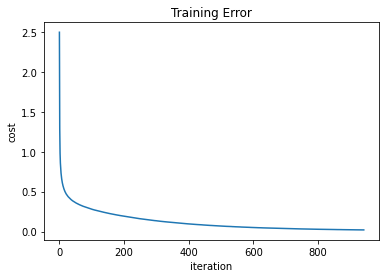

In [25]:
print('Training error in each iteration of the neural network \n')
plt.plot(nn_pl.named_steps.nn_clf.loss_curve_)
plt.title('Training Error')
plt.xlabel('iteration')
plt.ylabel('cost')

In [26]:
print('Accuracy and confusion matrix for the training set: \n')
print(nn_pl.score(x_train, y_train))
print(confusion_matrix(y_train, nn_pl.predict(x_train)))

Accuracy and confusion matrix for the training set: 

0.9992
[[513   0   0   0   0   0   0   0   0   0]
 [  0 495   0   0   0   0   0   0   0   0]
 [  0   0 493   0   0   0   0   0   0   0]
 [  0   0   0 519   0   0   0   0   0   0]
 [  0   0   1   0 501   0   0   0   0   0]
 [  0   0   0   0   0 449   0   0   0   0]
 [  1   0   0   0   0   0 498   0   0   0]
 [  0   0   0   0   0   0   0 522   0   0]
 [  0   0   0   0   0   0   0   0 514   0]
 [  0   0   0   0   0   0   0   2   0 492]]
